In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:

energy_df = pd.read_csv('energy_dataset.csv')
weather_df = pd.read_csv('weather_features.csv')

In [5]:
energy_df.fillna(0, inplace=True)
weather_df.fillna(0, inplace=True)

# Convert the 'time' columns to datetime and set as index
energy_df['time'] = pd.to_datetime(energy_df['time'], utc=True, errors='coerce')
weather_df['dt_iso'] = pd.to_datetime(weather_df['dt_iso'], utc=True, errors='coerce')

In [6]:
data = pd.merge(energy_df, weather_df, left_on='time', right_on='dt_iso')
data.set_index('time', inplace=True)
data.head()
data.index = pd.to_datetime(data.index)
# Check if 'city_name' and 'price actual' are available
print(data.columns)
data.fillna(0, inplace=True)
data.sort_index(inplace=True)

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed

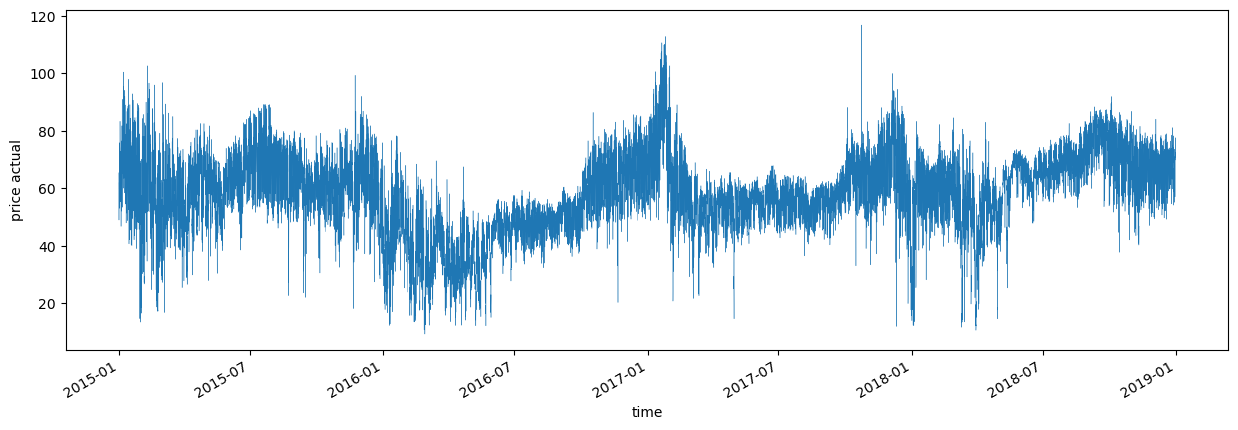

In [8]:
#Visualise actual price variation over time
plt.figure(figsize=(15,5))
data['price actual'].plot(kind='line', lw=0.3)
plt.ylabel('price actual')
plt.show()